# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

/home/bijan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/bijan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.182255924 W= 0.43101564 b= -0.50367075
Epoch: 0100 cost= 0.170091942 W= 0.42022562 b= -0.4260483
Epoch: 0150 cost= 0.159332648 W= 0.4100773 b= -0.353042
Epoch: 0200 cost= 0.149816006 W= 0.4005326 b= -0.28437805
Epoch: 0250 cost= 0.141398534 W= 0.3915555 b= -0.21979797
Epoch: 0300 cost= 0.133953229 W= 0.38311246 b= -0.15905873
Epoch: 0350 cost= 0.127367929 W= 0.37517145 b= -0.10193166
Epoch: 0400 cost= 0.121543311 W= 0.3677028 b= -0.048202366
Epoch: 0450 cost= 0.116391547 W= 0.3606782 b= 0.0023314646
Epoch: 0500 cost= 0.111834928 W= 0.35407156 b= 0.04985975
Epoch: 0550 cost= 0.107804783 W= 0.3478577 b= 0.09456138
Epoch: 0600 cost= 0.104240261 W= 0.34201345 b= 0.13660446
Epoch: 0650 cost= 0.101087630 W= 0.33651686 b= 0.17614685
Epoch: 0700 cost= 0.098299272 W= 0.33134714 b= 0.21333762
Epoch: 0750 cost= 0.095833182 W= 0.32648477 b= 0.24831676
Epoch: 0800 cost= 0.093652099 W= 0.32191172 b= 0.28121513
Epoch: 0850 cost= 0.091723122 W= 0.31761053 b= 0.31215754
Epoch: 0900 

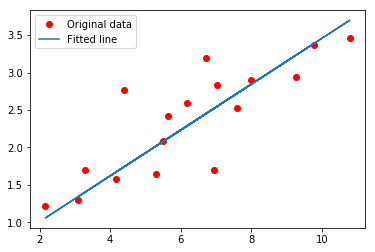

In [12]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [13]:
# Regression result